In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random 
import math 



In [9]:
dataset = pd.read_csv(r"C:\Users\HP\Downloads\Mall_Customers.csv")
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
dataset.shape

(200, 5)

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px #graphing
import plotly.graph_objects as go #graphing
from plotly.subplots import make_subplots #graphing
import plotly.figure_factory as ff #graphing
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
from sklearn.cluster import KMeans
import os

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

plt.rcParams["figure.figsize"] = (15, 12)



In [29]:
dataset.describe().style.background_gradient(cmap = "magma")

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
dataset.describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


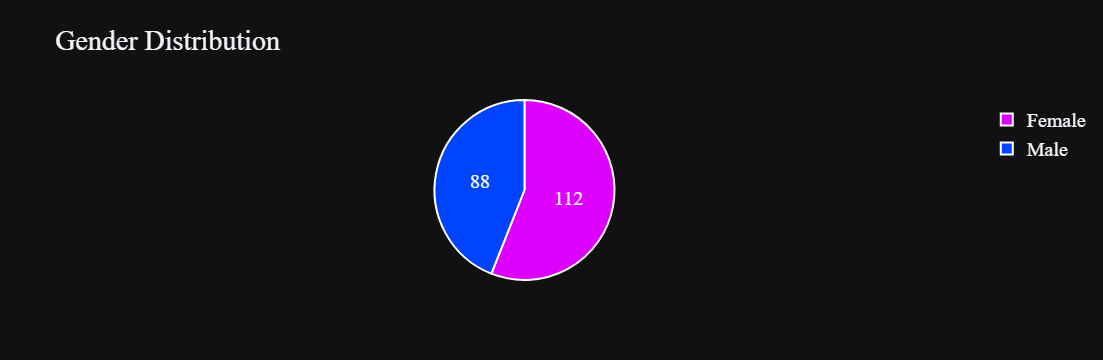

In [25]:
fig = px.pie(dataset, names = "Genre", color = "Genre", title = "Gender Distribution",
             color_discrete_sequence = ["#0044FF", "#DE00FF"])

fig.update_traces(textinfo = "value", textfont_size = 20,
                  marker = dict(line = dict(color = "#FFFFFF", width = 2)))

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))
fig.show()

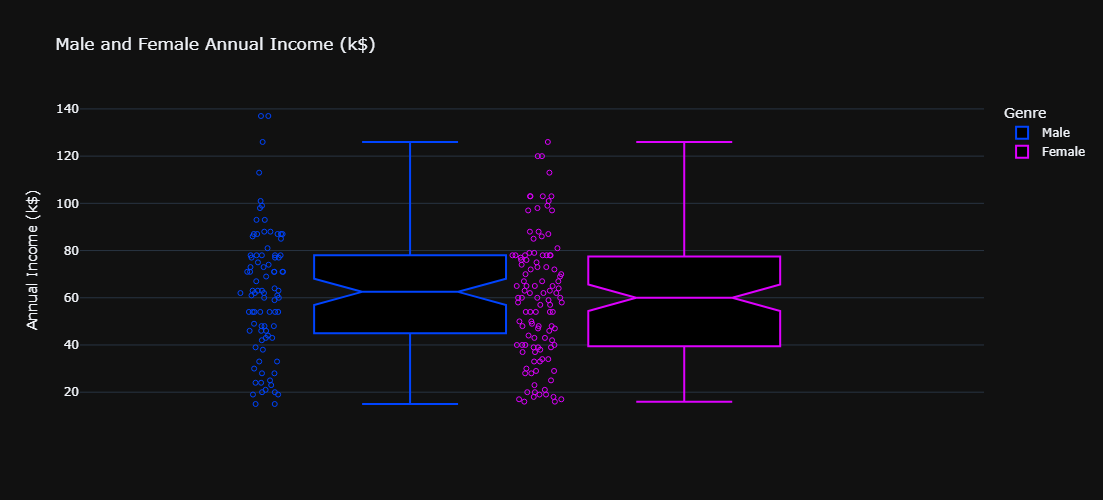

<Figure size 1600x1000 with 0 Axes>

In [41]:

plt.figure(figsize=(16,10))
fig = px.box(dataset, y = "Annual Income (k$)", color = "Genre",
             points = "all", notched = True,
             color_discrete_sequence = ["#0044FF", "#DE00FF"],
             title = "Male and Female Annual Income (k$)",
            width=1200,     # Width in pixels
            height=500)
      # Height in pixels

fig.update_traces(marker = dict(size = 5, symbol = "circle-open"))
fig.update_traces(fillcolor = "#000000")
fig.update_layout(template = "plotly_dark")

fig.show()

Annual Income (k$) & Spending Score (1-100) by Age 18 - 38

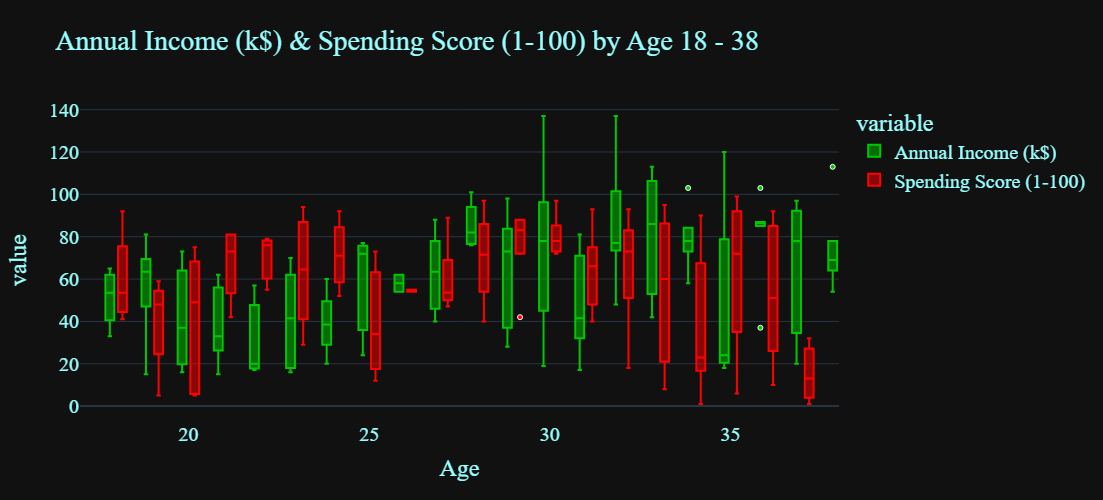

In [47]:
fig = px.box(dataset, x = "Age",  y = ["Annual Income (k$)", "Spending Score (1-100)"], color = "variable",
             range_x = (17, 38), color_discrete_sequence = ["#00C700", "#FF0000"],
             title = "Annual Income (k$) & Spending Score (1-100) by Age 18 - 38",width=1200,height=500)

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20, color = "#97FFFF"))
fig.update_traces(marker = dict(size = 5, line = dict(width = 1, color = "#FFFFFF")))

fig.show()

"Annual Income (k$) & Spending Score (1-100) by Age"

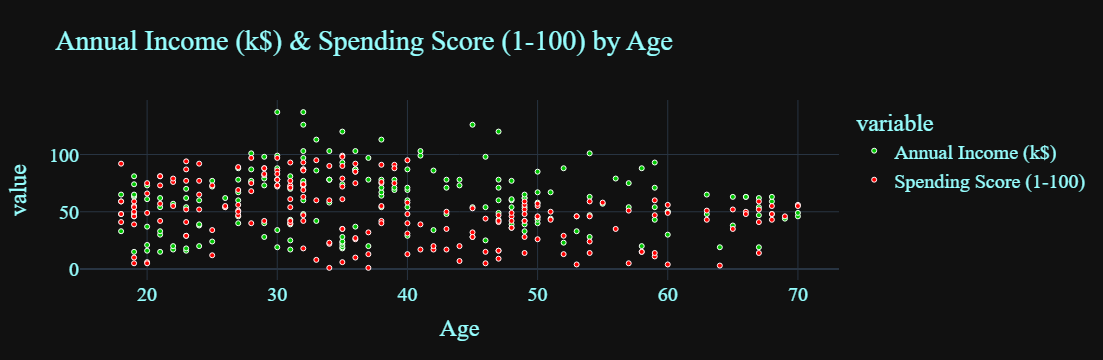

In [55]:
fig = px.scatter(dataset, x = "Age",  y = ["Annual Income (k$)", "Spending Score (1-100)"], color = "variable",
                 color_discrete_sequence = ["#00C700", "#FF0000"],
                 title = "Annual Income (k$) & Spending Score (1-100) by Age")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20, color = "#97FFFF"))
fig.update_traces(marker = dict(size = 5, line = dict(width = 1, color = "#FFFFFF")))

fig.show()

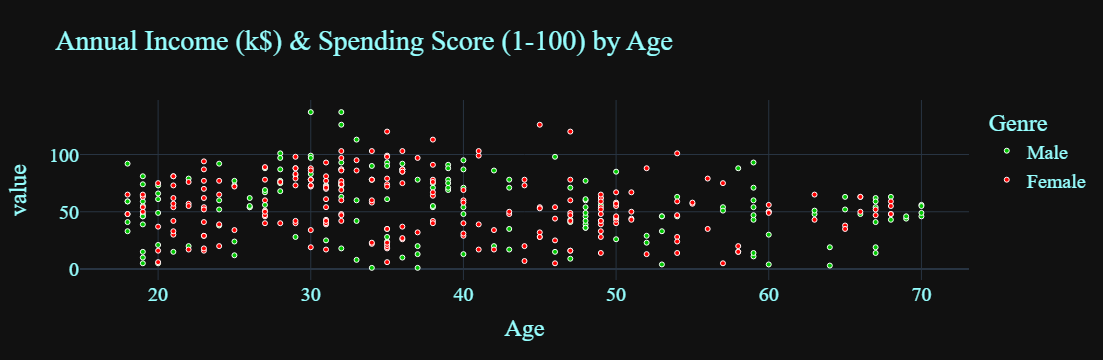

In [56]:
fig = px.scatter(dataset, x = "Age",  y = ["Annual Income (k$)", "Spending Score (1-100)"], color = "Genre",
                 color_discrete_sequence = ["#00C700", "#FF0000"],
                 title = "Annual Income (k$) & Spending Score (1-100) by Age")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20, color = "#97FFFF"))
fig.update_traces(marker = dict(size = 5, line = dict(width = 1, color = "#FFFFFF")))

fig.show()

Scatter_3d

In [88]:
fig = px.scatter_3d(dataset, x = "Spending Score (1-100)", y = "Annual Income (k$)", z = "Age",
                        hover_data = ["Age"], color = "Genre", opacity = 0.8,
                        title = f"Male and Female Mall Customers  💵  Spending Score,  Annual Income,  Age",
                        color_discrete_sequence = ["#0044FF", "#DE00FF"])

fig.update_traces(marker = dict(size = 3, line = dict(width = 1, color = "#FFFFFF")))
fig.update_coloraxes(showscale = False)
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#97FFFF"))
fig.show()

K means clustering-->
🤖 What is K-Means Clustering?
K-Means Clustering is an unsupervised machine learning algorithm used to group similar data points into clusters. The goal is to partition the dataset into K clusters where each data point belongs to the cluster with the nearest mean (centroid).

🧠 Simple Analogy:
Imagine you're organizing people at a party into groups based on height. You don’t know how many groups exactly, but you want people of similar height to stand together. That’s what K-means does—with data.

🔍 How It Works (Step-by-Step):
Choose K – the number of clusters you want.

Initialize K centroids randomly.

Assign each data point to the nearest centroid (based on Euclidean distance).

Update the centroids to be the mean of the points in each cluster.

Repeat steps 3–4 until the centroids stop moving (convergence).


In [82]:
#📊 Step 1: Select Features for Clustering

# Example: assuming your dataset is already loaded
X = dataset[["Annual Income (k$)", "Spending Score (1-100)"]]

KMeans(n_clusters=10, random_state=42)


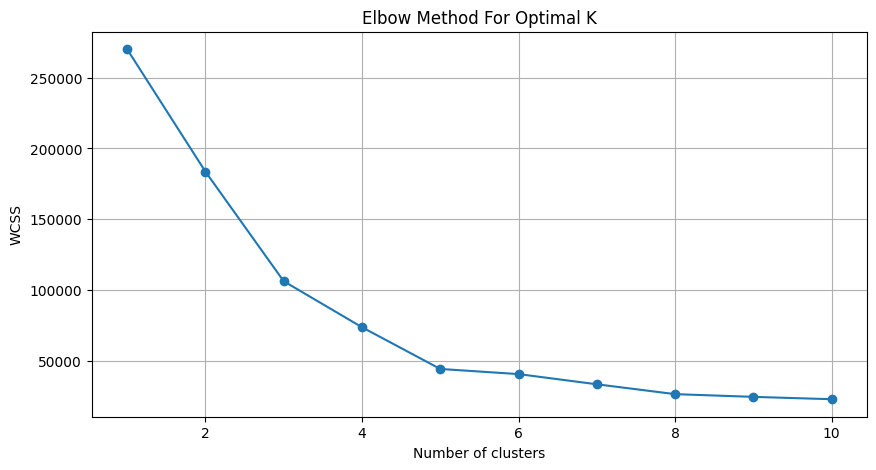

In [83]:
#📉 Step 2: Use the Elbow Method to Find Optimal K

wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow
print(kmeans)
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [76]:
#🚀 Step 3: Apply K-Means Clustering
#Let’s say the elbow occurs at K = 5


kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to the dataset
dataset["Cluster"] = y_kmeans
print(y_kmeans)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 4 0 0 0 4 0 0 0 0 4 0 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


🎯 What is n_clusters in K-Means?
n_clusters is the number of groups (or clusters) you want the K-Means algorithm to divide your data into.

So this line:


code ="kmeans = KMeans(n_clusters=5)"
…tells the algorithm:

“Please find 5 groups in this data where data points are similar within a group and different between groups.”

🎨 Why Different Colors in the Plot?
Each color in your scatter plot (or 3D plot) represents a separate cluster found by K-Means. For example:

🔵 Cluster 0 → Low income, low spenders

🔴 Cluster 1 → High income, high spenders

🟡 Cluster 2 → Middle-aged budget-conscious people

🟢 Cluster 3 → Young impulsive spenders

🟣 Cluster 4 → Retired age, high income

The color is just for visual differentiation — the algorithm itself only uses numbers (0, 1, 2, …, K-1) to represent clusters.

❓Why Use n_clusters=5 or n_clusters=10?
-->You choose this based on:

-->The Elbow Method (see your earlier WCSS plot)

-->Your understanding of the data (e.g., how many groups logically make sense)

*Too few clusters (n_clusters=2) may oversimplify your data.
*Too many clusters (n_clusters=10) may overfit and cause confusion.

👉 In your case, if n_clusters=5 gives a clear elbow in the plot — stick to n_cluster=5

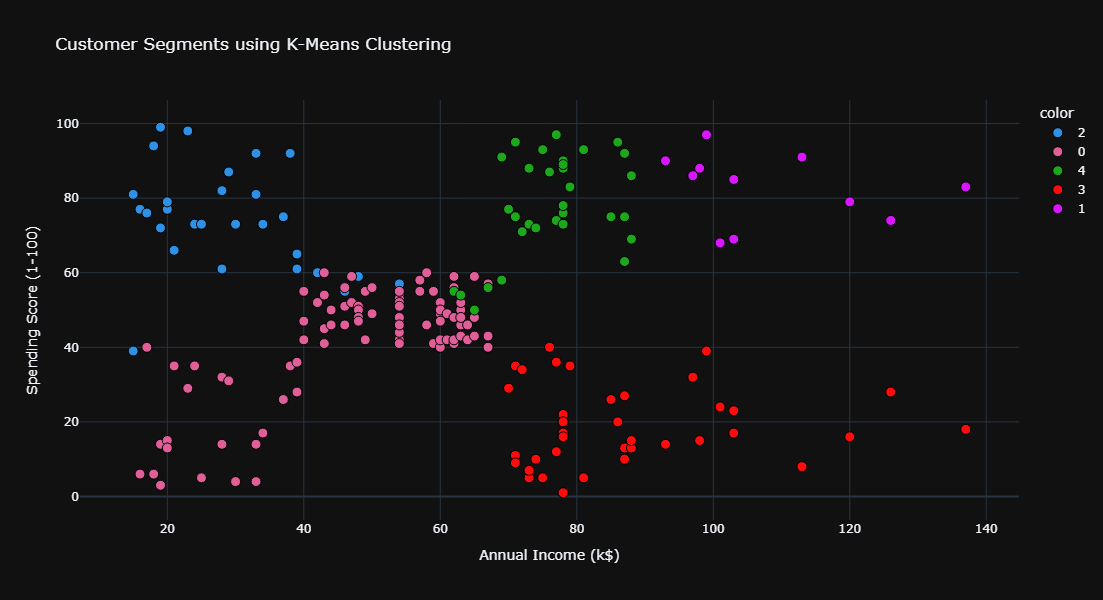

In [77]:
#📈 Step 4: Visualize Clusters with Plotly

fig = px.scatter(
    dataset,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    color=dataset["Cluster"].astype(str),
    title="Customer Segments using K-Means Clustering",
    width=900,
    height=600,
    color_discrete_sequence=px.colors.qualitative.Dark24
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color="black")))
fig.update_layout(template="plotly_dark")
fig.show()

Choosing the right number of clusters (n_clusters) after plotting the Elbow Method is a key step in K-Means clustering.

🔍 What is the Elbow Method?
The Elbow Method involves plotting the WCSS (Within-Cluster Sum of Squares) against various values of K (number of clusters).
As K increases:

WCSS decreases (clusters are tighter)

But after a point, the rate of improvement drops — that’s your elbow 📐

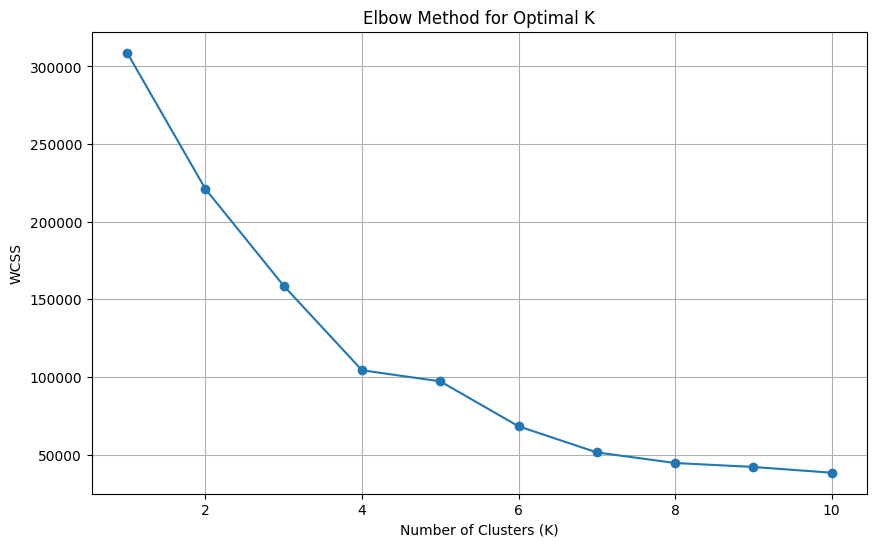

In [84]:
#The elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract the same features
X = dataset[["Annual Income (k$)", "Spending Score (1-100)", "Age"]]

# Run KMeans for a range of cluster counts and store WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS = Within Cluster Sum of Squares

# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()


Look at the Curve:

Find the point where the curve bends or flattens.

That’s the optimal K — more clusters after that don’t reduce WCSS significantly.

🔻 Example:
If the plot looks like this:


K = 1   WCSS = 1000
K = 2   WCSS = 800
K = 3   WCSS = 600
K = 4   WCSS = 500
K = 5   WCSS = 450
K = 6   WCSS = 430
The drop slows down after K=4, so you choose:


n_clusters = 4

📌 Best Practices:
Elbow Point ≠ Exact: It’s a heuristic, so some subjectivity is okay.

If you see multiple possible elbows, try clustering with those values and visualize the results.

For more precision, you can also try Silhouette Score or Davies-Bouldin Index.

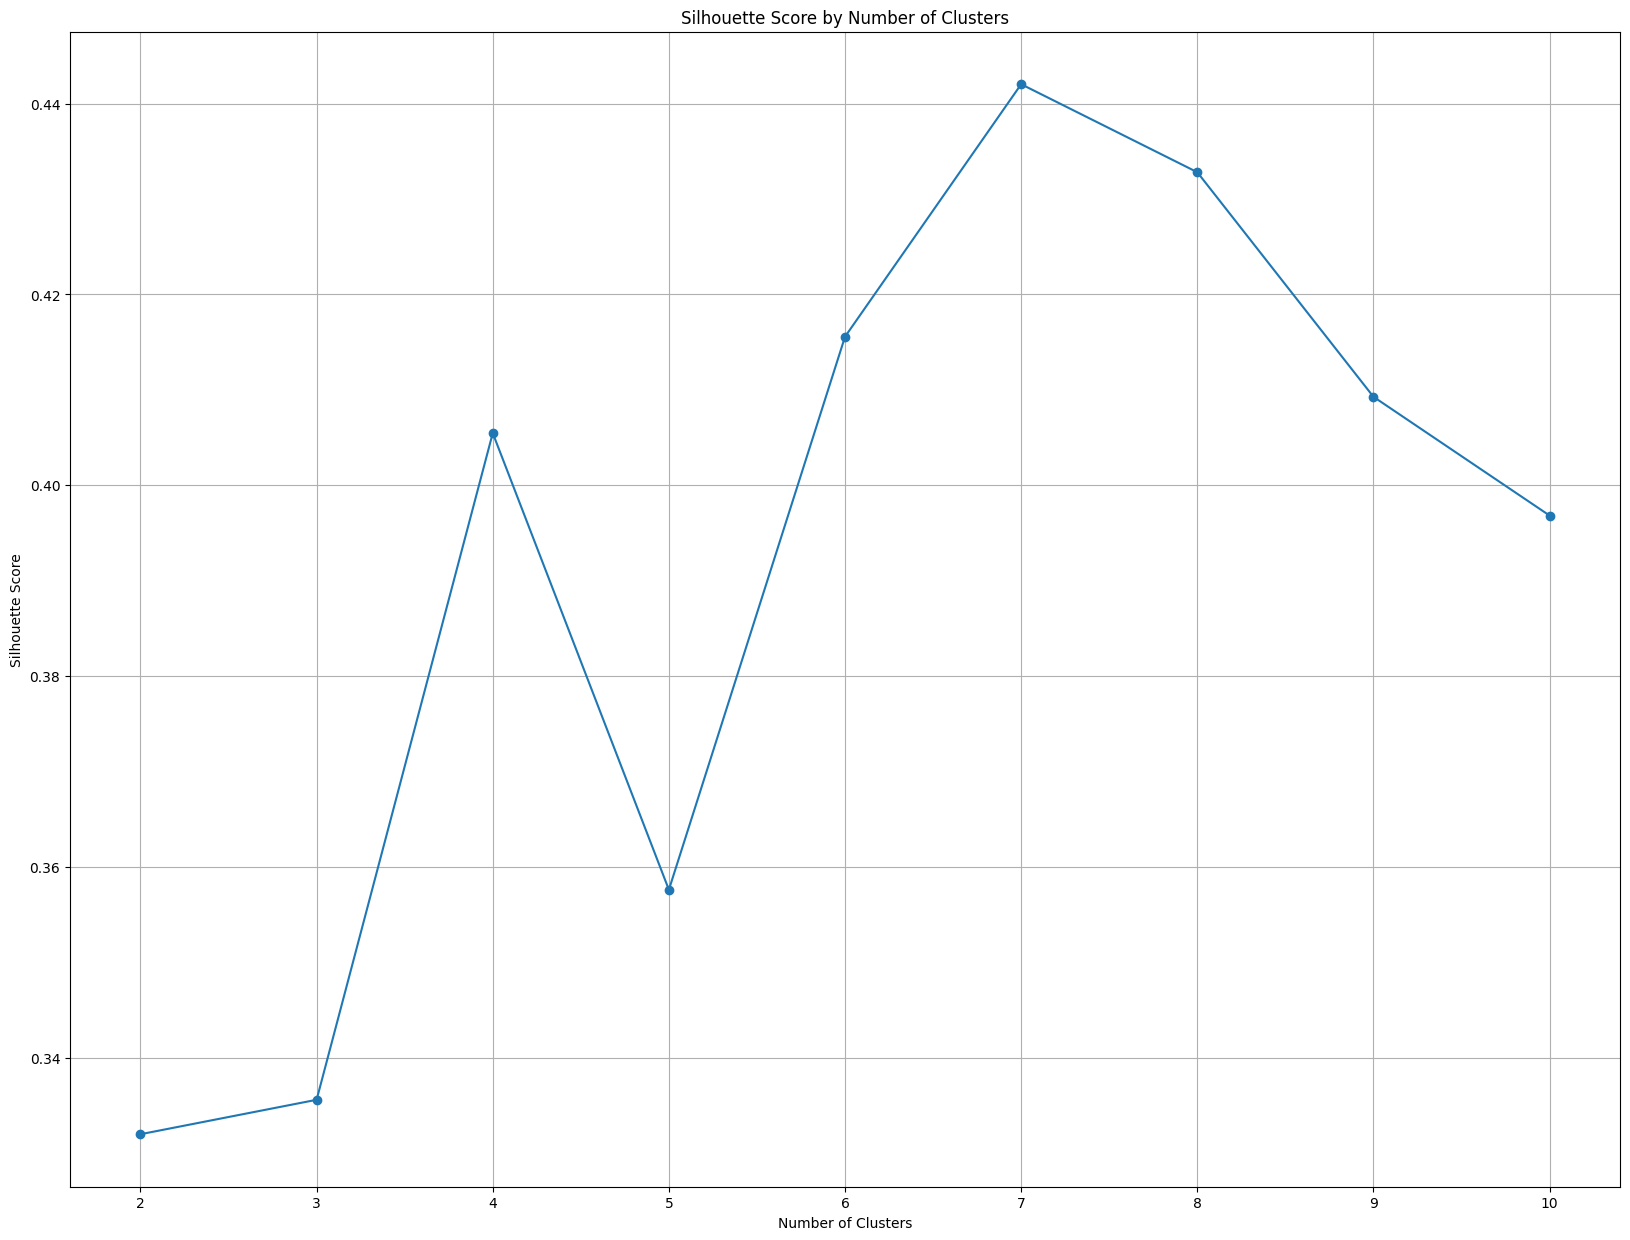

In [81]:
#the Silhouetter Score 
from sklearn.metrics import silhouette_score

scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    preds = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, preds))

# Plot Silhouette Scores
plt.plot(range(2, 11), scores, marker='o')
plt.title("Silhouette Score by Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()


THE 3D scatter Plot 

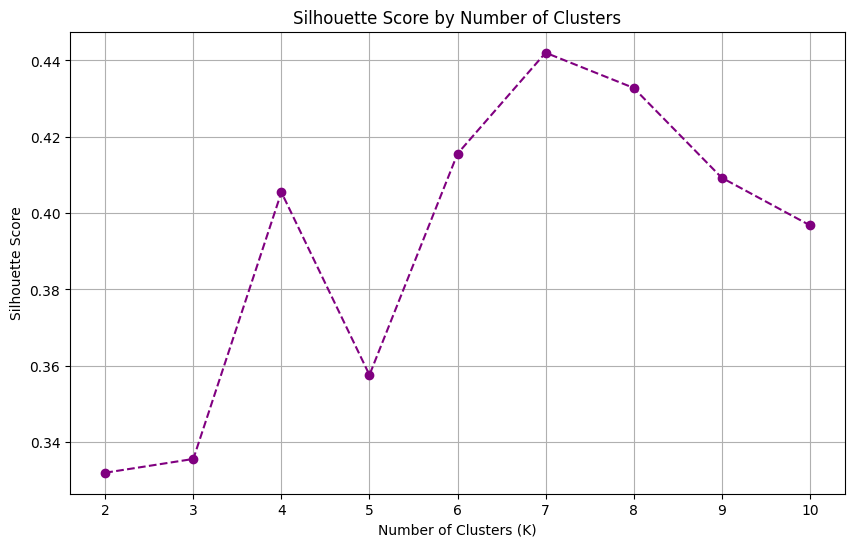

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

# Load your dataset


# Select features for clustering
features = ["Annual Income (k$)", "Spending Score (1-100)", "Age"]
X = dataset[features]

# ------------------------------
# 1. Silhouette Score Plot
scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds)
    scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o', linestyle='--', color='purple')
plt.title("Silhouette Score by Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# ------------------------------
# 2. Apply KMeans with chosen K (e.g., 5 based on Silhouette)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X)

# ------------------------------
# 3. 3D Cluster Visualization (colored by Gender)
fig = px.scatter_3d(
    dataset,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    z="Age",
    color="Genre",  # You can change to 'Cluster' if you want
    symbol="Cluster",  # Symbol shows clusters
    title=f"3D K-Means Clustering (K={optimal_k}) Colored by Gender",
    width=1000,
    height=700
)

fig.update_traces(marker=dict(size=6, line=dict(width=1, color='black')))
fig.update_layout(template="plotly_dark")
fig.show()


To focus on clustering instead of gender, change color="Genre" to color="Cluster".

Always inspect silhouette scores before finalizing K.

In [87]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px

# 1. Select features for clustering
features = ["Annual Income (k$)", "Spending Score (1-100)", "Age"]
X = dataset[features]

# 2. Apply KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X)

# 3. Plot in 3D and color by Gender
fig = px.scatter_3d(
    dataset,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    z="Age",
    color="Cluster",  # Gender column
    symbol="Cluster",  # To visually distinguish clusters
    title="3D K-Means Clustering Colored by Gender",
    width=1000,
    height=700
)

fig.update_traces(marker=dict(size=6, line=dict(width=1, color='black')))
fig.update_layout(template="plotly_dark")
fig.show()


In [89]:
 # Group by Cluster and compute mean values for each
cluster_summary = dataset.groupby('Cluster')[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean().round(2)

# Optional: Add size of each cluster
cluster_summary["Count"] = dataset["Cluster"].value_counts().sort_index()

print(cluster_summary)


           Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                          
0        46.21               47.72                   41.80     89
1        32.45              108.18                   82.73     11
2        24.69               29.59                   73.66     29
3        40.39               87.00                   18.63     38
4        31.79               76.09                   77.76     33


In [92]:
#🧠 :Gender Distribution per Cluster

gender_dist = dataset.groupby(['Cluster', 'Genre']).size().unstack(fill_value=0).sort_index()
print(gender_dist)

#This helps you analyze whether certain clusters are dominated by a specific gender (useful for marketing insights).



Genre    Female  Male
Cluster              
0            55    34
1             6     5
2            15    14
3            18    20
4            18    15


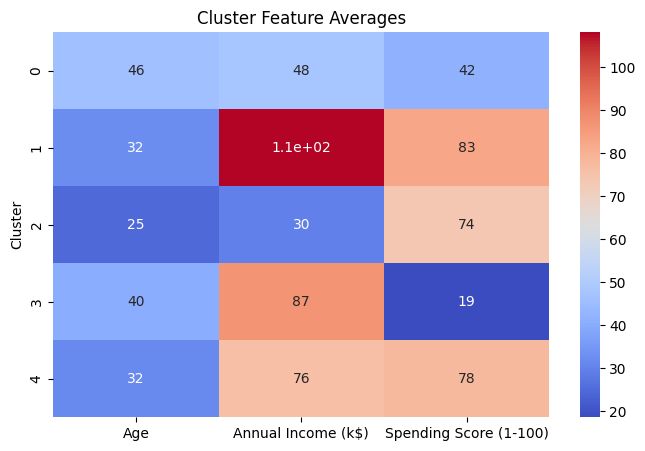

In [93]:
# Visualize Summary as a Heatmap

import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(cluster_summary.drop(columns='Count'), annot=True, cmap='coolwarm')
plt.title("Cluster Feature Averages")
plt.show()
